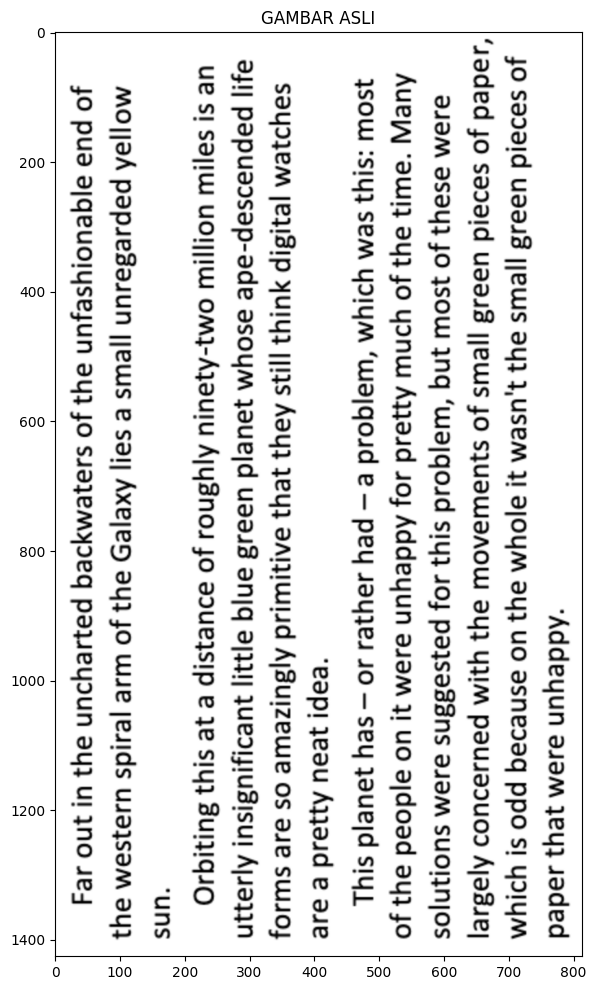

Sudut Rotasi Teks: 90.0 derajat
Jenis Skrip: Latin
Teks Sebelum diRotasi: 
‘Addeyun asam jeu} Jaded

jo sadaid uaa8 |jeWs 34} },USeM }! BJOYM ay} UO asnedaq ppo s! YDIUM

‘1aded jo sadaid uaai3 |jewWs JO SJUBLUBAOW 9} YIM pausaoUOD Ajazie}

319M BS9U} JO JSOW Ng ‘Wajqod siy} JO} pajsadsns a1aM suO!yNjos

Aue *awi} ay} Jo YonwW Ayasd 10} Addeyun 34am } UO ajdoad ay} Jo
JSOW :SIy} SEM YIIYM ‘Wajqoud e — pey Jayjes JO — sey Jaued siyy

“eap! yeau Ajyjaud e aue

SAYIIEM [eUSIP YUIY []19S Ady} JEU} SAIZILUIId AjsuIZeWe Os ae SWUIOJ

a}1] PaPUsdsap-ade ssoUM Joue|d UB! an|g aj}}1] JUeDIJIUSISU! AjJa}4N
Ue SI Sa]! UOI||IL OM}-AjauIU A]YBNOJ JO adUejSIP e }e SIY} BUIZIGIO

‘uns

MO}||aA papsesaiun |jews e salj Axejed ay} JO Wie jesIds Ua}sSaM au}
JO pua ajqeuolysejun ay} JO SsajzeMyIeg PayeyouN au} ul yNoO Je



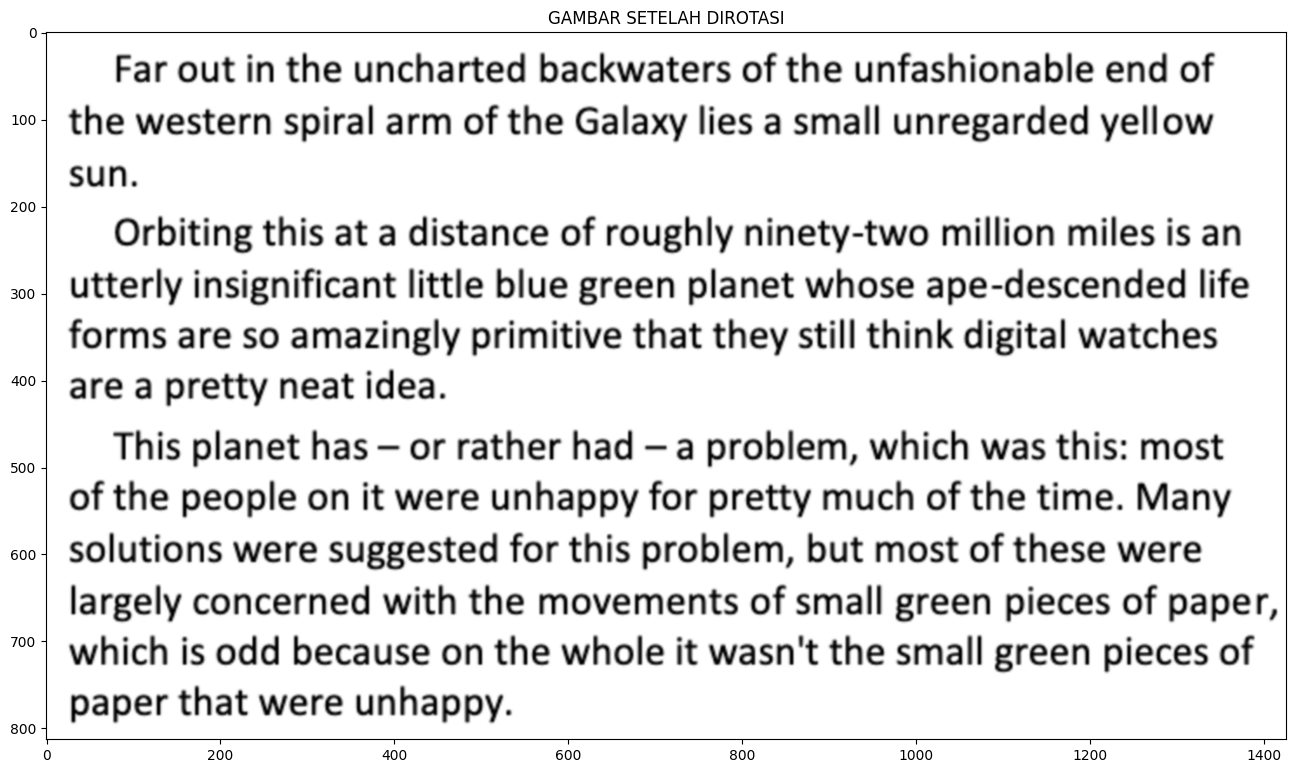


Teks Setelah diRotasi: 
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [12]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Membaca gambar dari direktori
image = cv2.imread('data/images/hitchhikers-rotated.png')

plt.figure(figsize=(16, 12))
plt.imshow(image)
plt.title('GAMBAR ASLI')
plt.show()

def get_text_orientation_and_script(image_path):
    # Baca gambar
    image = cv2.imread(image_path)

    # Gunakan Tesseract untuk mendeteksi teks
    text = pytesseract.image_to_string(image)

    # Mendapatkan sudut rotasi
    osd = pytesseract.image_to_osd(image)
    rotation_angle = float(osd.split('\n')[2].split(':')[1])

    # Mendapatkan jenis skrip (gunakan metode lain berdasarkan kebutuhan)
    script_type = "Latin"  # Atau gunakan metode deteksi skrip lainnya

    return text, rotation_angle, script_type

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    # Use a negative angle to rotate clockwise
    matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
    
    # Hitung ukuran gambar yang diperlukan setelah rotasi
    rotated_height = int(abs(matrix[0, 0] * height) + abs(matrix[0, 1] * width))
    rotated_width = int(abs(matrix[0, 1] * height) + abs(matrix[0, 0] * width))

    # Sesuaikan matriks rotasi untuk memastikan seluruh gambar dapat ditampilkan
    matrix[0, 2] += (rotated_width - width) / 2
    matrix[1, 2] += (rotated_height - height) / 2

    rotated_image = cv2.warpAffine(image, matrix, (rotated_width, rotated_height))
    return rotated_image


def get_text_rotation_angle(image_path, rotation_angle):
    # Baca gambar
    image = cv2.imread(image_path)
    
    # Rotasi gambar sesuai orientasi teks
    rotated_image = rotate_image(image, rotation_angle)

    # Gunakan Tesseract untuk mendeteksi teks
    text_rotation = pytesseract.image_to_string(rotated_image)

    return text_rotation

def main():
    image_path = 'data/images/hitchhikers-rotated.png'
    
    # Dapatkan teks, orientasi teks, dan jenis skrip
    text, rotation_angle, script_type = get_text_orientation_and_script(image_path)
    
    # Dapatkan teks setelah dirotasi
    text_rotation = get_text_rotation_angle(image_path, rotation_angle)
    
    # Dapatkan gambar setelah dirotasi
    rotated_image = rotate_image(image, rotation_angle)

    # Tampilkan hasil    
    print(f"Sudut Rotasi Teks: {rotation_angle} derajat")
    print(f"Jenis Skrip: {script_type}")
    print(f"Teks Sebelum diRotasi: \n{text}")
    # Tampilkan gambar yang sudah dirotasi
    plt.figure(figsize=(16, 12))
    plt.imshow(rotated_image)
    plt.title('GAMBAR SETELAH DIROTASI')
    plt.show()
    print(f"\nTeks Setelah diRotasi: \n{text_rotation}")    

if __name__ == "__main__":
    main()